# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **Data Loading**

In [2]:
file_path = '/content/Products_Data.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Brand,Model,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
0,Infinix,Zero 40 4G,"Rs.70,000",23,6.78 inches,8GB,500mAh,256GB
1,Samsung,Galaxy Z Flip 6,"Rs.385,000",39,6.7 inches,12GB,4000mAh,512GB
2,Samsung,Galaxy Z Fold 6,"Rs.605,000",45,7.6 inches,12GB,4400mAh,512GB
3,Samsung,Galaxy A05,"Rs.25,000",56,6.7 inches,4GB,5000mAh,64GB
4,Tecno,Phantom V Fold 2 5G,"Rs.370,000",37,7.85 inches,12GB,5750mAh,512GB


In [4]:
data.tail()

,Brand,Model,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
1340,gfive,GFive Disco,"Rs 3,199",59,2.4 InchesDisplay,32 MBRAM,3000 mAhBattery,32 MB
1341,gfive,GFive Spark,"Rs 2,325",3 Ratings,1.8 inchesDisplay,32 MBRAM,3000 mAhBattery,32 MB
1342,e-tachi,E-Tachi E888,"Rs 3,749",38,2.8 InchesDisplay,32 MBRAM,3000 mAhBattery,32 MB
1343,sparx,SparX Edge 20,"Rs 5,000",24,6.67 inchesDisplay,8GB+8GB RAMRAM,5000 mAhBattery,256 GB
1344,gfive,GFive 4G Style,"Rs 6,999",39,2.8 InchDisplay,2GBRAM,4000 mAhBattery,16gb


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              1345 non-null   object
 1   Model              1345 non-null   object
 2   Price              1345 non-null   object
 3   Number of Ratings  1345 non-null   object
 4   Display Size       1345 non-null   object
 5   RAM                1345 non-null   object
 6   Battery            1345 non-null   object
 7   Internal Memory    1345 non-null   object
dtypes: object(8)
memory usage: 84.2+ KB


In [6]:
data.describe()

,Brand,Model,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
count,1345,1345,1345,1345,1345,1345,1345,1345
unique,63,689,457,204,142,112,98,70
top,Samsung,Galaxy S24 Ultra,"Rs.25,000",2,6.6 inches,8GB,5000mAh,128GB
freq,182,14,34,92,135,339,712,340


#**Data consistency**

In [7]:
def clean_price(value):
    # Convert value to string to handle cases with numbers and strings
    value = str(value).strip()  # Remove leading/trailing whitespace

    # Check for strings representing null values
    null_values = ["Price Not Available", "price Not Available"]
    if value in null_values:
        return np.nan  # Using np.nan for better compatibility with pandas

    # Normalize whitespace and remove currency symbols and commas
    cleaned_value = value.replace('Rs.', '').replace('Rs', '').replace(',', '').strip()
    cleaned_value = ' '.join(cleaned_value.split())  # Normalize multiple spaces to a single space

    # Directly convert cleaned value to float
    return float(cleaned_value)


data['Price'] = data['Price'].apply(clean_price)
output_file_path = '/content/Cleaned_Products_Data.csv'
data.to_csv(output_file_path, index=False)

data.head()

,Brand,Model,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
0,Infinix,Zero 40 4G,70000.0,23,6.78 inches,8GB,500mAh,256GB
1,Samsung,Galaxy Z Flip 6,385000.0,39,6.7 inches,12GB,4000mAh,512GB
2,Samsung,Galaxy Z Fold 6,605000.0,45,7.6 inches,12GB,4400mAh,512GB
3,Samsung,Galaxy A05,25000.0,56,6.7 inches,4GB,5000mAh,64GB
4,Tecno,Phantom V Fold 2 5G,370000.0,37,7.85 inches,12GB,5750mAh,512GB


In [8]:
def clean_number_of_ratings(value):
    # Remove any non-numeric characters and strip the value
    numeric_part = ''.join(filter(str.isdigit, str(value)))
    try:
        # Attempt to convert the cleaned string to an integer if it's not empty
        return int(numeric_part) if numeric_part else np.nan
    except ValueError:
        # Return NaN if conversion fails
        return np.nan

data['Number of Ratings'] = data['Number of Ratings'].apply(clean_number_of_ratings)
data.to_csv(output_file_path, index=False)

data.head()

,Brand,Model,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
0,Infinix,Zero 40 4G,70000.0,23,6.78 inches,8GB,500mAh,256GB
1,Samsung,Galaxy Z Flip 6,385000.0,39,6.7 inches,12GB,4000mAh,512GB
2,Samsung,Galaxy Z Fold 6,605000.0,45,7.6 inches,12GB,4400mAh,512GB
3,Samsung,Galaxy A05,25000.0,56,6.7 inches,4GB,5000mAh,64GB
4,Tecno,Phantom V Fold 2 5G,370000.0,37,7.85 inches,12GB,5750mAh,512GB


In [9]:
def extract_screen_size(text):
    # Use a regular expression to find the first floating-point number in the string
    match = re.search(r'\d+(\.\d+)?', text)
    return float(match.group()) if match else None


data['Display Size'] = data['Display Size'].apply(extract_screen_size)
data.to_csv(output_file_path, index=False)

data.head()

,Brand,Model,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
0,Infinix,Zero 40 4G,70000.0,23,6.78,8GB,500mAh,256GB
1,Samsung,Galaxy Z Flip 6,385000.0,39,6.70,12GB,4000mAh,512GB
2,Samsung,Galaxy Z Fold 6,605000.0,45,7.60,12GB,4400mAh,512GB
3,Samsung,Galaxy A05,25000.0,56,6.70,4GB,5000mAh,64GB
4,Tecno,Phantom V Fold 2 5G,370000.0,37,7.85,12GB,5750mAh,512GB


In [10]:
def clean_ram(ram_value):
    # Remove 'RAM' and unnecessary text in parentheses
    ram_value = ram_value.replace('RAM', '').strip()
    ram_value = re.sub(r'\(.*?\)', '', ram_value)  # Remove text within parentheses

    # Split the string by common delimiters
    ram_values = re.split(r'[+,/]', ram_value)  # Split by +, , or /

    # Initialize a list to store numeric values
    numeric_values = []

    # Process each split value
    for value in ram_values:
        value = value.strip()  # Clean leading/trailing spaces

        # Extract GB values
        match = re.findall(r'(\d+)\s*GB', value)
        if match:
            numeric_values.extend([float(num) for num in match])  # Add GB values to the list
        else:
            # Extract MB values and convert to GB
            match = re.findall(r'(\d+)\s*MB', value)
            if match:
                numeric_values.extend([float(num) / 1024 for num in match])  # Convert MB to GB

    # Return the maximum value found or NaN if no valid values
    return min(numeric_values) if numeric_values else np.nan


data['RAM'] = data['RAM'].apply(clean_ram)
data.head()

,Brand,Model,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
0,Infinix,Zero 40 4G,70000.0,23,6.78,8.0,500mAh,256GB
1,Samsung,Galaxy Z Flip 6,385000.0,39,6.70,12.0,4000mAh,512GB
2,Samsung,Galaxy Z Fold 6,605000.0,45,7.60,12.0,4400mAh,512GB
3,Samsung,Galaxy A05,25000.0,56,6.70,4.0,5000mAh,64GB
4,Tecno,Phantom V Fold 2 5G,370000.0,37,7.85,12.0,5750mAh,512GB


In [11]:
def convert_battery_values(battery_list):
    converted_values = []

    for battery in battery_list:
        match = re.search(r'(\d+)', battery)

        if match:
            num_value = float(match.group(1))
            if 'Wh' in battery:
                mAh_value = (num_value * 1000) / 3.7
                converted_values.append(round(mAh_value, 2))
            else:
                converted_values.append(num_value)
        else:
            converted_values.append(None)

    return converted_values

data['Battery'] = convert_battery_values(data['Battery'])
# data['converted_battery']
# data.to_csv(output_file_path, index=False)


data.head()

,Brand,Model,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
0,Infinix,Zero 40 4G,70000.0,23,6.78,8.0,500.0,256GB
1,Samsung,Galaxy Z Flip 6,385000.0,39,6.70,12.0,4000.0,512GB
2,Samsung,Galaxy Z Fold 6,605000.0,45,7.60,12.0,4400.0,512GB
3,Samsung,Galaxy A05,25000.0,56,6.70,4.0,5000.0,64GB
4,Tecno,Phantom V Fold 2 5G,370000.0,37,7.85,12.0,5750.0,512GB


In [12]:
def convert_memory_values(memory_list):
    converted_values = []

    for memory in memory_list:
        # Normalize the format: remove whitespace and convert to upper case
        memory = memory.replace(" ", "").upper()

        # Handle multiple values and strip units
        values = re.findall(r'(\d+)', memory)  # Extract numeric parts
        if values:
            # Convert extracted values to floats and handle units
            numeric_values = [float(v) for v in values]

            # Check for original units to decide conversion
            if "MB" in memory:
                # Convert MB to GB (1 GB = 1024 MB)
                numeric_values = [v / 1024 for v in numeric_values]

            # Change to max, min, or another metric as per your analysis needs
            converted_values.append(np.mean(numeric_values))  # Average of values
        else:
            converted_values.append(None)  # Handle cases with no valid numbers

    return converted_values


data['Internal Memory'] = convert_memory_values(data['Internal Memory'])
output_file_path = '/content/Cleaned_Products_Data.csv'
data.to_csv(output_file_path, index=False)

data.head()


,Brand,Model,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
0,Infinix,Zero 40 4G,70000.0,23,6.78,8.0,500.0,256.0
1,Samsung,Galaxy Z Flip 6,385000.0,39,6.70,12.0,4000.0,512.0
2,Samsung,Galaxy Z Fold 6,605000.0,45,7.60,12.0,4400.0,512.0
3,Samsung,Galaxy A05,25000.0,56,6.70,4.0,5000.0,64.0
4,Tecno,Phantom V Fold 2 5G,370000.0,37,7.85,12.0,5750.0,512.0


# **Data Cleaning and Exploration**

In [13]:
data.head()

,Brand,Model,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
0,Infinix,Zero 40 4G,70000.0,23,6.78,8.0,500.0,256.0
1,Samsung,Galaxy Z Flip 6,385000.0,39,6.70,12.0,4000.0,512.0
2,Samsung,Galaxy Z Fold 6,605000.0,45,7.60,12.0,4400.0,512.0
3,Samsung,Galaxy A05,25000.0,56,6.70,4.0,5000.0,64.0
4,Tecno,Phantom V Fold 2 5G,370000.0,37,7.85,12.0,5750.0,512.0


In [14]:
data.tail()

,Brand,Model,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
1340,gfive,GFive Disco,3199.0,59,2.40,0.03125,3000.0,0.03125
1341,gfive,GFive Spark,2325.0,3,1.80,0.03125,3000.0,0.03125
1342,e-tachi,E-Tachi E888,3749.0,38,2.80,0.03125,3000.0,0.03125
1343,sparx,SparX Edge 20,5000.0,24,6.67,8.00000,5000.0,256.00000
1344,gfive,GFive 4G Style,6999.0,39,2.80,2.00000,4000.0,16.00000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1345 non-null   object 
 1   Model              1345 non-null   object 
 2   Price              1329 non-null   float64
 3   Number of Ratings  1345 non-null   int64  
 4   Display Size       1345 non-null   float64
 5   RAM                1339 non-null   float64
 6   Battery            1343 non-null   float64
 7   Internal Memory    1345 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 84.2+ KB


In [16]:
data.isna().sum()

,0
Brand,0
Model,0
Price,16
Number of Ratings,0
Display Size,0
RAM,6
Battery,2
Internal Memory,0


In [17]:
# Calculate the threshold for 5% of the dataset size
threshold = 0.05 * len(data)
print(threshold)

missing_values = data.isna().sum()

# Loop through each column and remove rows with missing values if the count is below the threshold
for column, missing_count in missing_values.items():
    if missing_count > 0 and missing_count <= threshold:
        data = data[data[column].notna()]  # Remove rows where the column has missing values

# Verify the result to ensure rows with missing values were removed
data.isna().sum()

# output_file_path = '/content/Cleaned_Products_Data.csv'
# data.to_csv(output_file_path, index=False)


67.25


,0
Brand,0
Model,0
Price,0
Number of Ratings,0
Display Size,0
RAM,0
Battery,0
Internal Memory,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 0 to 1344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1321 non-null   object 
 1   Model              1321 non-null   object 
 2   Price              1321 non-null   float64
 3   Number of Ratings  1321 non-null   int64  
 4   Display Size       1321 non-null   float64
 5   RAM                1321 non-null   float64
 6   Battery            1321 non-null   float64
 7   Internal Memory    1321 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 92.9+ KB


In [19]:
print(data.shape)
data.describe()

(1321, 8)


,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,94990.382286,36.120363,6.250210,7.019777,6015.367108,166.005358
std,134932.889057,66.086627,1.178786,17.936991,30583.428131,131.648996
min,2250.000000,2.000000,0.000000,0.003906,30.000000,0.003906
25%,23299.000000,5.000000,6.500000,4.000000,5000.000000,64.000000
50%,40000.000000,19.000000,6.600000,6.000000,5000.000000,128.000000
75%,90000.000000,43.000000,6.700000,8.000000,5000.000000,256.000000
max,735000.000000,991.000000,7.850000,512.000000,945945.950000,512.000000


In [20]:
print("Before Removing:", data.shape)
data.drop_duplicates(inplace=True)
print("After Removing:", data.shape)


Before Removing: (1321, 8)
After Removing: (1263, 8)


In [21]:
skewness = data[['Price', 'Number of Ratings', 'Display Size', 'RAM', 'Internal Memory']].skew()
print("Skewness of each column:")
skewness


Skewness of each column:


,0
Price,2.334930
Number of Ratings,6.886896
Display Size,-2.758634
RAM,21.021897
Internal Memory,1.190465


--- Detection of outliers in Number of Ratings ---
Before removing outliers: Box plot of Number of Ratings


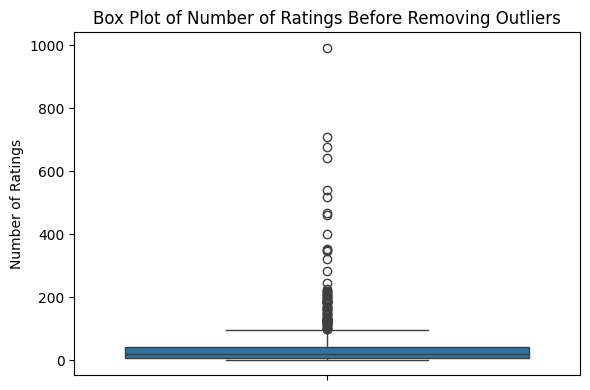

Total outliers detected in Number of Ratings: 87
After removing outliers: Box plot of Number of Ratings


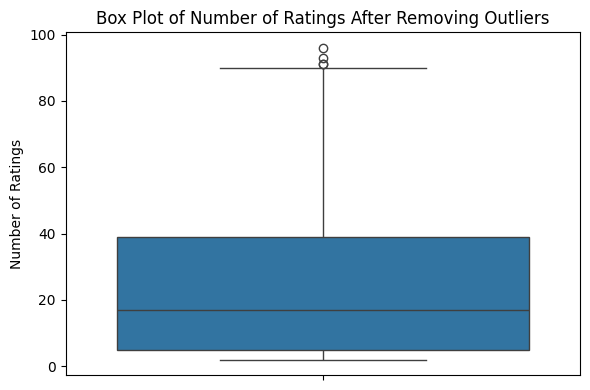



--- Detection of outliers in RAM ---
Before removing outliers: Box plot of RAM


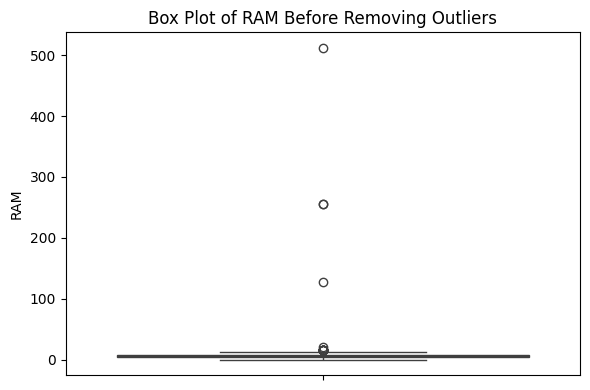

Total outliers detected in RAM: 15
After removing outliers: Box plot of RAM


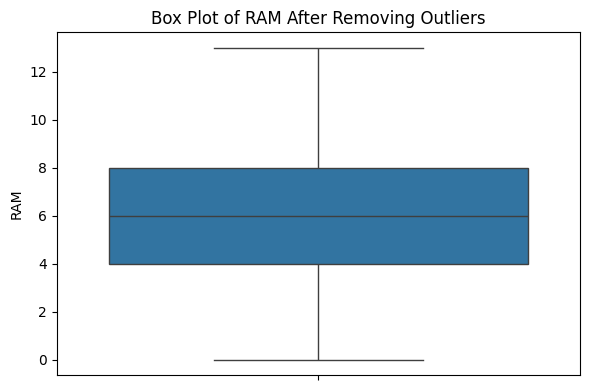



--- Detection of outliers in Internal Memory ---
Before removing outliers: Box plot of Internal Memory


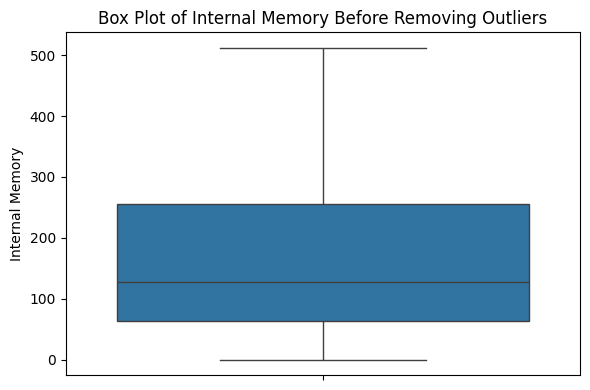

Total outliers detected in Internal Memory: 0
After removing outliers: Box plot of Internal Memory


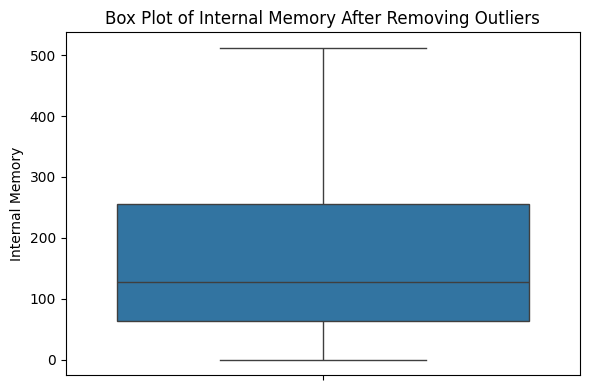

In [22]:
# Detect outliers using IQR and visualize with box plots before and after removing outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Plotting function for box plots
def plot_boxplot(data, column, title):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[column])
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Columns to analyze
columns_to_analyze = ['Number of Ratings', 'RAM', 'Internal Memory']

# Loop through each column to detect outliers and visualize the process
for column in columns_to_analyze:
    print(f"--- Detection of outliers in {column} ---")

    # Box plot before removing outliers
    print(f"Before removing outliers: Box plot of {column}")
    plot_boxplot(data, column, title=f'Box Plot of {column} Before Removing Outliers')

    # Detect and count outliers
    outliers = detect_outliers_iqr(data, column)
    print(f"Total outliers detected in {column}: {len(outliers)}")

    # if len(outliers) > 0:
    #     print(f"Outlier values in {column} that will be removed:")
    #     print(outliers[column].values)
    # else:
    #     print(f"No outliers detected in {column}.")

    # Remove outliers from the data
    data = data[~data.index.isin(outliers.index)]

    # Box plot after removing outliers
    print(f"After removing outliers: Box plot of {column}")
    plot_boxplot(data, column, title=f'Box Plot of {column} After Removing Outliers')
    print("\n" + "="*50 + "\n")

# Save the cleaned data after outlier removal
output_file_path = '/content/Cleaned_Products_Data_After_Outlier_Removal.csv'
data.to_csv(output_file_path, index=False)


In [23]:
data['Battery'].describe()

,Battery
count,1161.000000
mean,6166.849225
std,32620.247774
min,30.000000
25%,4500.000000
50%,5000.000000
75%,5000.000000
max,945945.950000


In [24]:
len1=data.shape[0]
data = data[(data['Battery'] >= 700) & (data['Battery'] <= 10000)]
len2=data.shape[0]

In [25]:
data['Battery'].describe()

,Battery
count,1146.000000
mean,4688.028796
std,854.633803
min,800.000000
25%,4600.000000
50%,5000.000000
75%,5000.000000
max,7200.000000


In [26]:
print(data.shape)

(1146, 8)


In [27]:
data.describe()

,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,100987.728621,23.294939,6.263312,6.024508,4688.028796,169.367981
std,139757.865369,19.837777,1.159922,3.251012,854.633803,133.790231
min,2250.000000,2.000000,0.000000,0.003906,800.000000,0.003906
25%,24000.000000,5.000000,6.500000,4.000000,4600.000000,64.000000
50%,40499.500000,17.000000,6.600000,6.000000,5000.000000,128.000000
75%,100000.000000,38.750000,6.700000,8.000000,5000.000000,256.000000
max,735000.000000,96.000000,7.850000,13.000000,7200.000000,512.000000


# **Data Transformation**

In [28]:
columns_to_standardize = ['Price', 'Number of Ratings', 'Battery', 'RAM', 'Display Size', 'Internal Memory']

# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit and transform the data
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])
# Save the cleaned data after outlier removal
output_file_path = '/content/standardScalar.csv'
data.to_csv(output_file_path, index=False)

In [ ]:
data.head()

,Brand,Model,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
1,Samsung,Galaxy Z Flip 6,2.033061,0.792020,0.376645,1.838843,-0.805408,2.562082
2,Samsung,Galaxy Z Fold 6,3.607899,1.094605,1.152898,1.838843,-0.337167,2.562082
3,Samsung,Galaxy A05,-0.543947,1.649345,0.376645,-0.623003,0.365194,-0.787905
4,Tecno,Phantom V Fold 2 5G,1.925686,0.691158,1.368524,1.838843,1.243146,2.562082
5,Tecno,Phantom V Flip 2 5G,0.708765,-0.166167,0.549145,0.607920,0.037426,0.647804


In [29]:
data.tail()

,Brand,Model,Price,Number of Ratings,Display Size,RAM,Battery,Internal Memory
1340,gfive,GFive Disco,-0.700007,1.800638,-3.332121,-1.844310,-1.976011,-1.266241
1341,gfive,GFive Spark,-0.706263,-1.023492,-3.849623,-1.844310,-1.976011,-1.266241
1342,e-tachi,E-Tachi E888,-0.696069,0.741589,-2.987119,-1.844310,-1.976011,-1.266241
1343,sparx,SparX Edge 20,-0.687114,0.035557,0.350769,0.607920,0.365194,0.647804
1344,gfive,GFive 4G Style,-0.672805,0.792020,-2.987119,-1.238465,-0.805408,-1.146832
